In [ ]:
import time

import matplotlib.patches as mpatches
import numpy as np
from matplotlib import pyplot as plt
from mne import Annotations, create_info
from mne.io import RawArray
from mne.viz import set_browser_backend

from mne_lsl.player import PlayerLSL
from mne_lsl.stream import StreamLSL
from mne_lsl.lsl import StreamInfo, StreamInlet, resolve_streams


In [ ]:
# same as source_id defined in the PsychoPy script
source_id = 'Cyton_Stream'

## Find LSL streams on the local network

In [3]:
streams = resolve_streams()
streams

[< sInfo 'BrainVision RDA Markers' >
   | Type: Markers
   | Sampling: Irregular
   | Number of channels: 1
   | Data type: string
   | Source: RDA 127.0.0.1:51244 Marker,
 < sInfo 'BrainVision RDA' >
   | Type: EEG
   | Sampling: 500.0 Hz
   | Number of channels: 17
   | Data type: <class 'numpy.float32'>
   | Source: RDA 127.0.0.1:51244]

## Open the marker stream

In [ ]:
eeg_stream = StreamLSL(bufsize=2, name=streams[0].name).connect()

# eeg_stream = StreamInlet(streams[0])
# eeg_stream.open_stream()

# Only the initial .time_correction() call takes a few ms to complete so we do it here (future calls are 'instantaneous')
initial_time_offset = eeg_stream.time_correction()

NameError: name 'marker_stream_idx' is not defined

In [ ]:
for i in range(15):
    sample, timestamp = eeg_stream.pull_sample(timeout=0)
    timestamp = timestamp - eeg_stream.time_correction()
    
    print((sample, timestamp))
    time.sleep(0.150)

## Plot EEG data

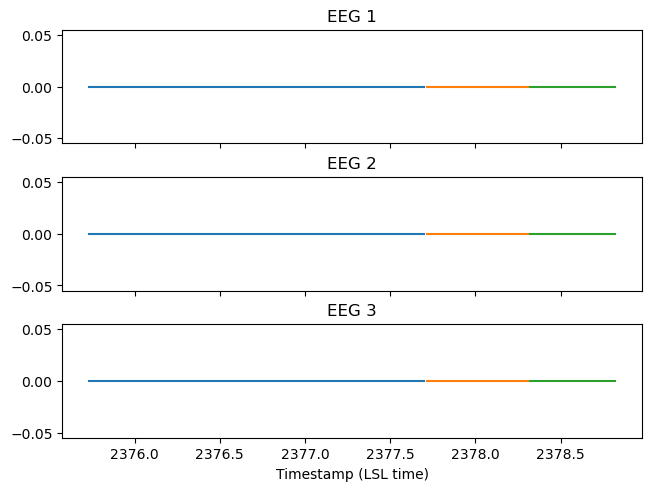

In [ ]:
picks = ("1", "2", "3")  # channel selection
f, ax = plt.subplots(3, 1, sharex=True, constrained_layout=True)
for _ in range(3):  # acquire 3 separate window
    # figure how many new samples are available, in seconds
    winsize = eeg_stream.n_new_samples / stream.info["sfreq"]
    # retrieve and plot data
    data, ts = eeg_stream.get_data(winsize, picks=picks)
    for k, data_channel in enumerate(data):
        ax[k].plot(ts, data_channel)
    time.sleep(0.5)
for k, ch in enumerate(picks):
    ax[k].set_title(f"EEG {ch}")
ax[-1].set_xlabel("Timestamp (LSL time)")
plt.show()

In [ ]:
eeg_stream.close_stream()
marker_stream.close_stream()

NameError: name 'inlet_eeg' is not defined

In [19]:
eeg_stream.disconnect()

NameError: name 'eeg_stream' is not defined